#Ejercicio dataset k-means-psicologia

In [71]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [72]:
df_psico = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/DeepLearning/main/Datasets/k-means-psicologia.csv")
df_psico.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [73]:
df_psico.describe()
df_psico.isnull().sum()

usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

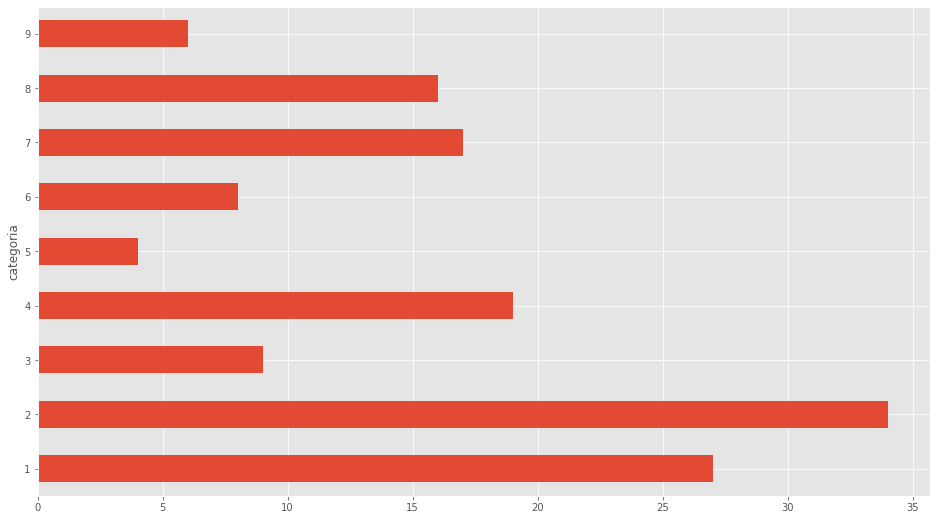

In [74]:
df_psico.groupby('categoria').size().plot.barh()

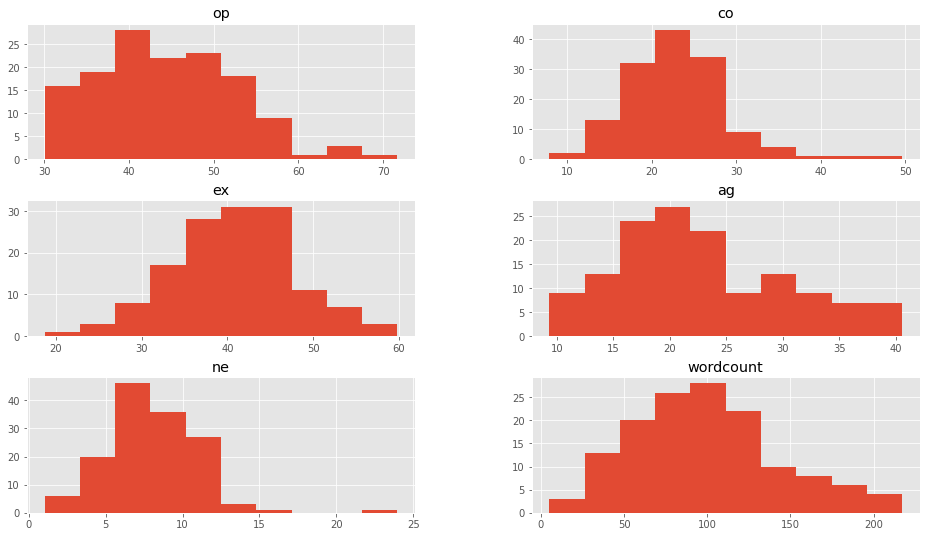

In [75]:
#Dispersión de los mismos datos
df_psico.drop(['categoria'],1).hist()
plt.show()

##Separamos datos (X y Y)

In [76]:
X = np.array(df_psico[["op","ex","ag","co","ne"]])
y = np.array(df_psico['categoria'])
#forma de la matriz
X.shape

(140, 5)

##Buscamos el total de clousters (agrupamientos) idoneo

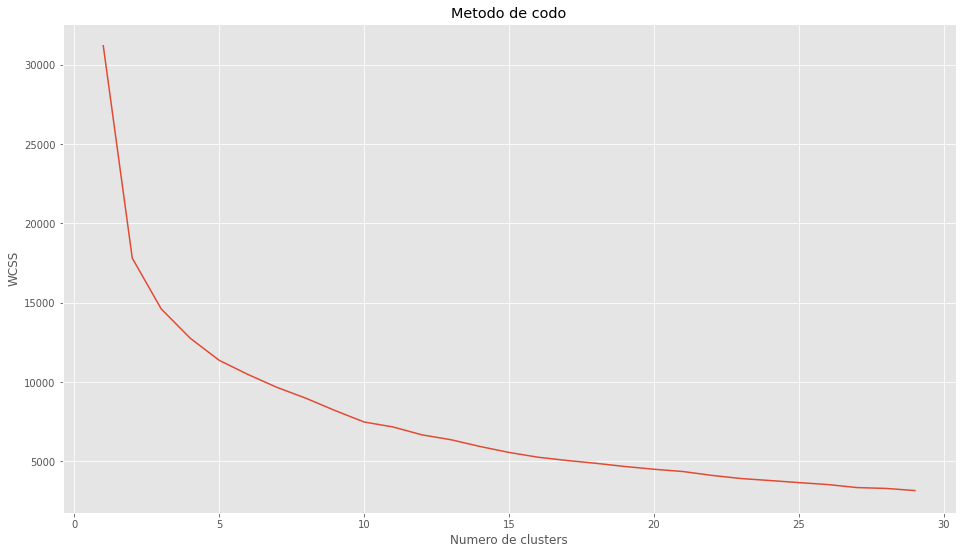

In [77]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

##Centroides

In [78]:
kmeans = KMeans(n_clusters=10).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[35.22951067 44.15859928 35.62180367 20.36421539  8.71291561]
 [51.74264639 42.97146467 15.93275078 20.88124561  6.59767472]
 [40.18102892 34.39332675 19.92037508 30.47500433 11.03234425]
 [37.63005673 43.14177036 27.58250473 16.51197973  7.57874518]
 [41.66435136 43.61933182 22.00477505 24.31100409  9.42778936]
 [36.78918886 52.98093836 31.08273843 17.6494315   5.57693807]
 [51.0523764  35.3441214  15.173118   33.0770415   7.2735498 ]
 [49.13316487 36.96993871 21.02702762 24.25565242  8.67357042]
 [38.81528    21.3382215  13.3573675  17.4348775   8.9133485 ]
 [61.93625244 29.62719367 15.08910133 21.92653989  4.93914989]]


In [82]:
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan','orange','purple','pink','gray','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])


#Graficas

##Vilsualizamos los grupos y los centroides

In [83]:
# mostramos grupos 
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
f3 = df_psico['ag'].values
f4 = df_psico['co'].values
f5 = df_psico['ne'].values


##Graficas con x (OP)

x (OP) y (EX)

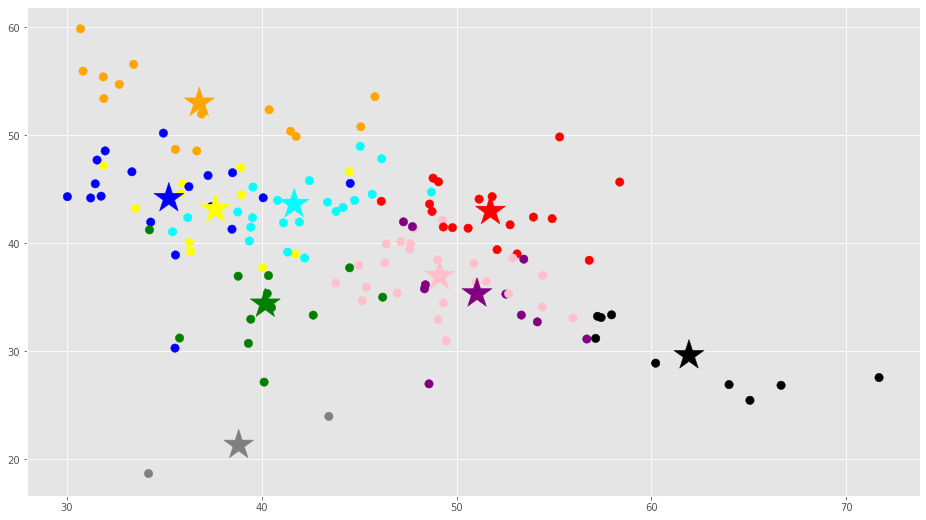

In [84]:

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(AG)

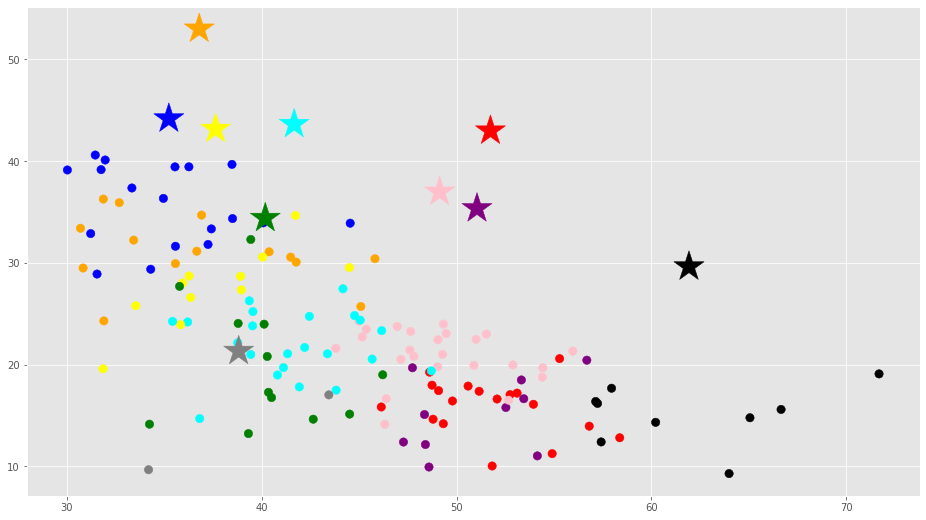

In [85]:
plt.scatter(f1, f3, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(CO)

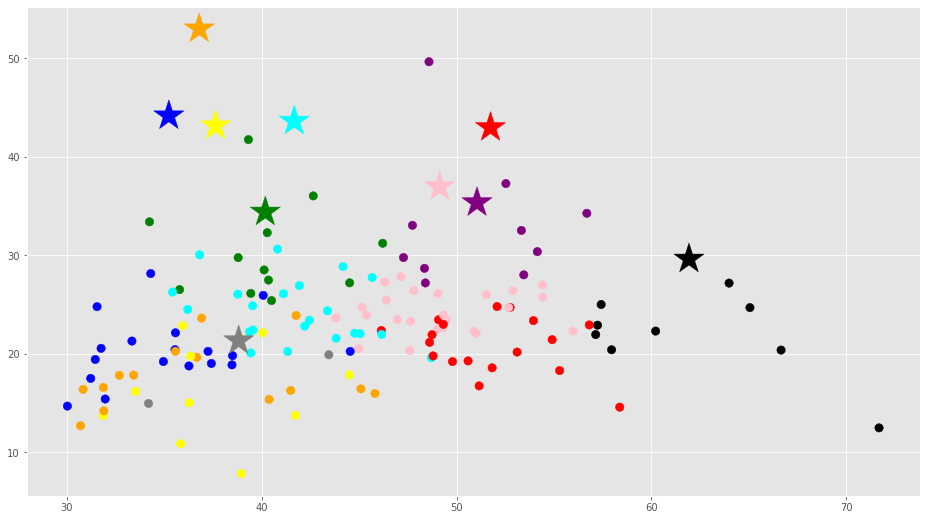

In [86]:
plt.scatter(f1, f4, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(NE)

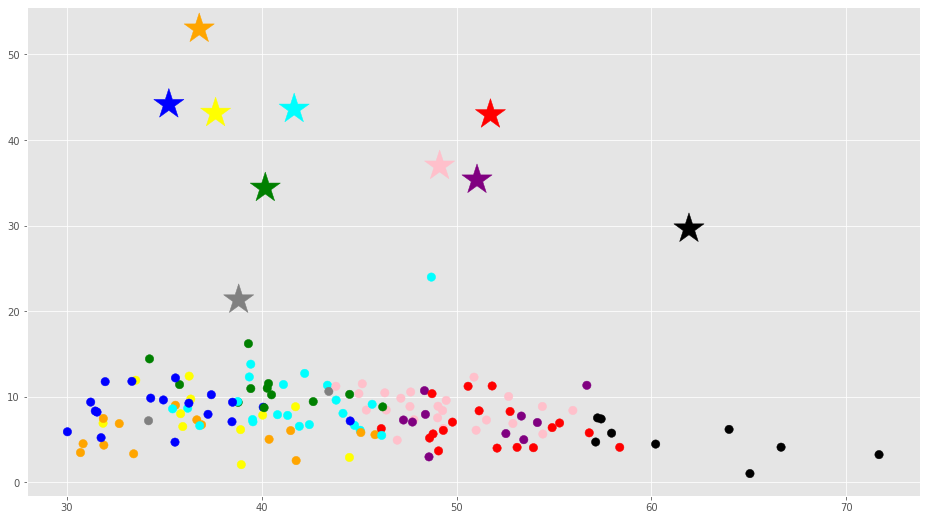

In [87]:
plt.scatter(f1, f5, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

##Graficas con x(EX)

y(OP)

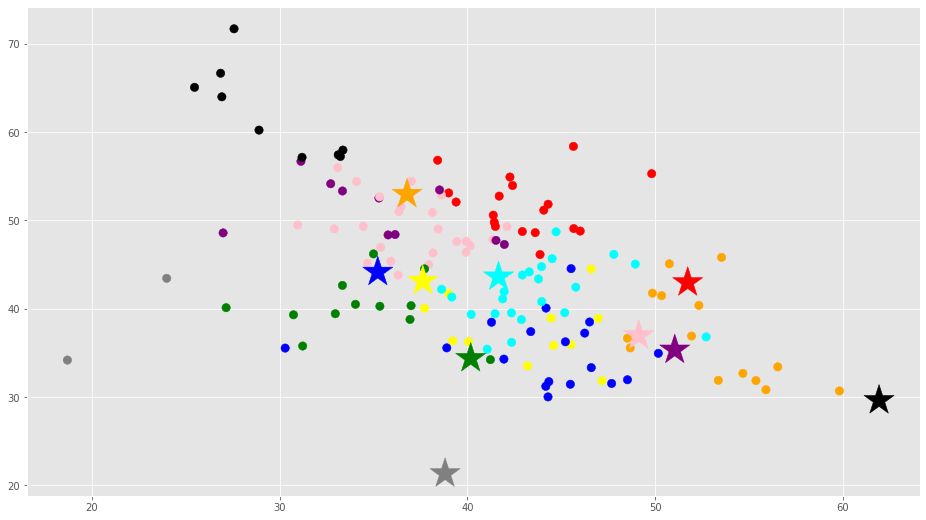

In [88]:
plt.scatter(f2, f1, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(AG)

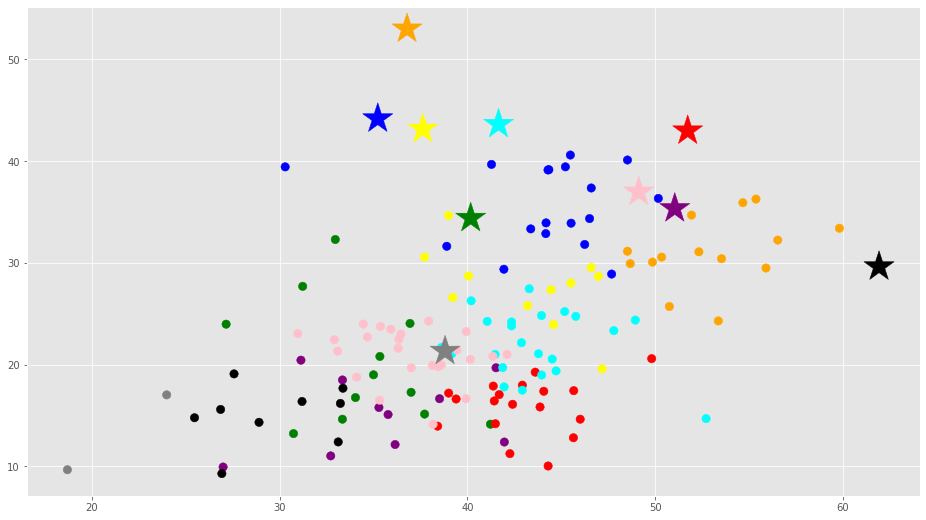

In [89]:
plt.scatter(f2, f3, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(CO)

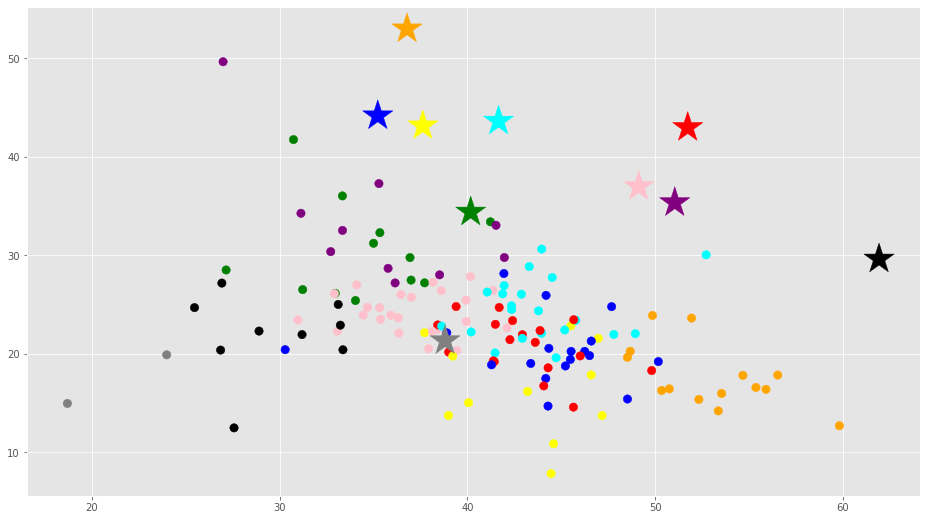

In [90]:
plt.scatter(f2, f4, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(ne)

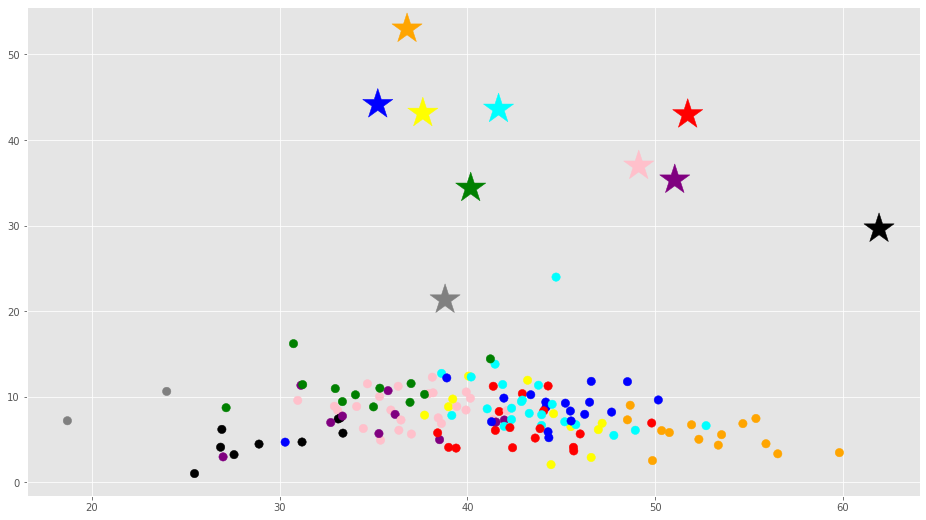

In [91]:
plt.scatter(f2, f5, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

##Graficas cen x(AG)

 y(OP)

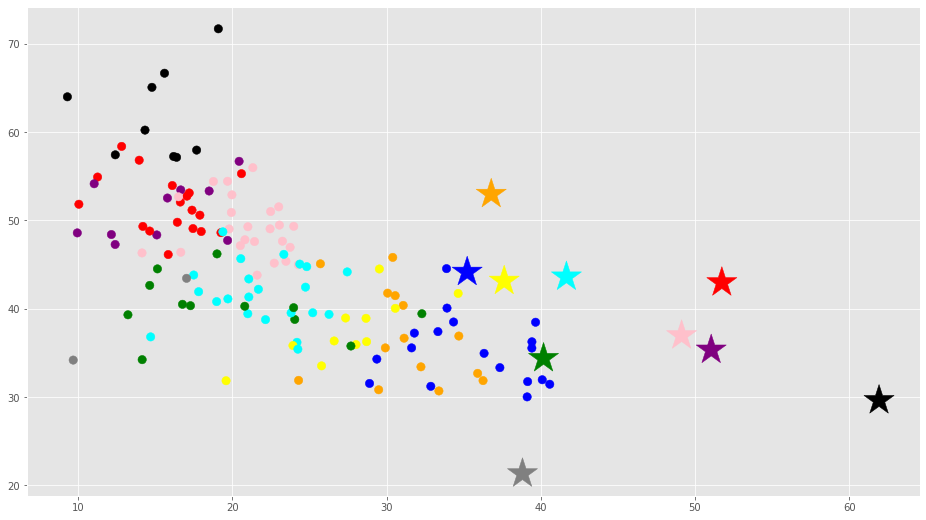

In [92]:
plt.scatter(f3, f1, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(ex)

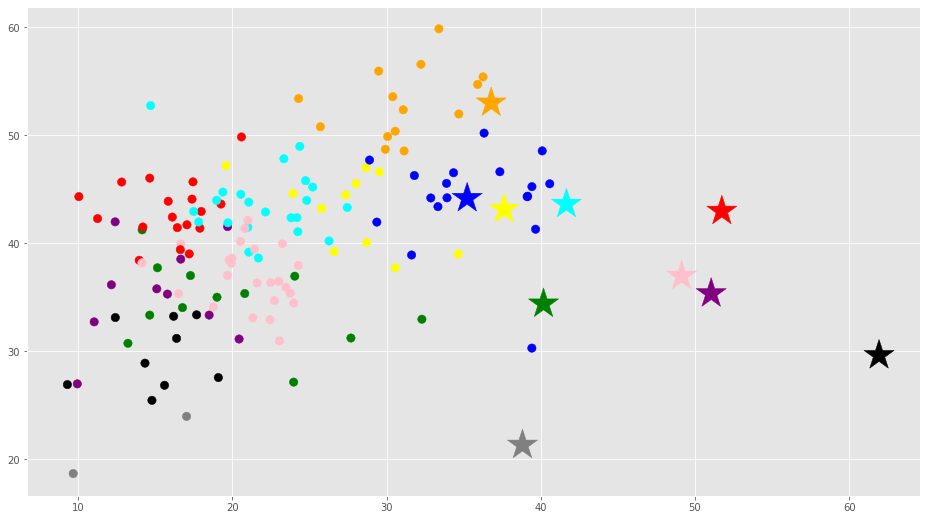

In [93]:
plt.scatter(f3, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(CO)

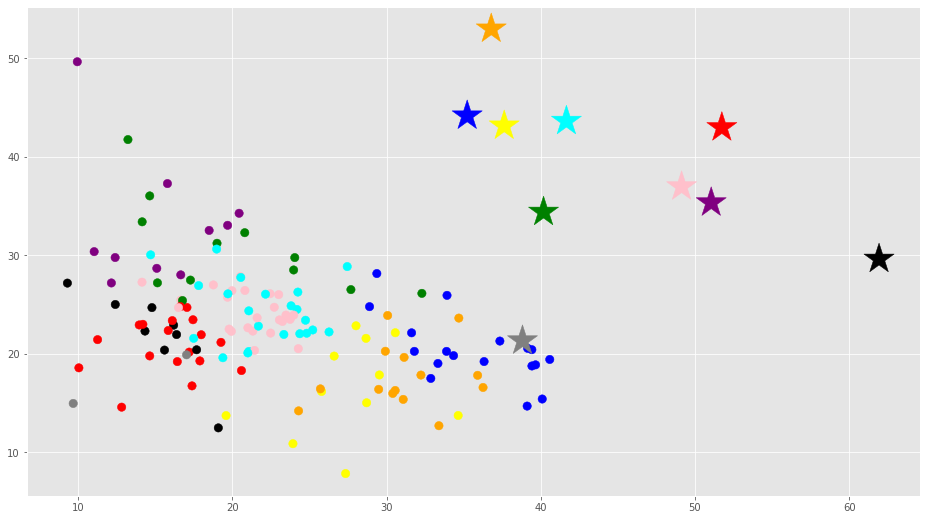

In [94]:
plt.scatter(f3, f4, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(NE)

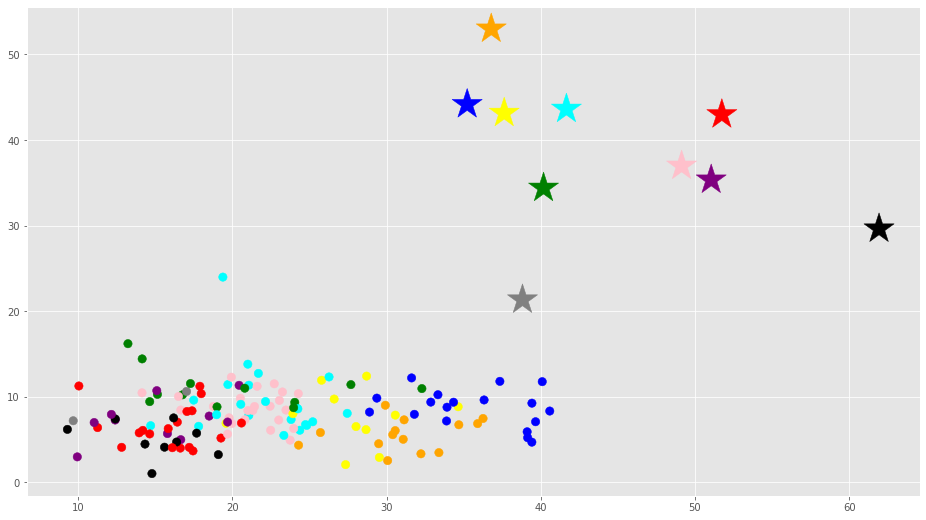

In [95]:
plt.scatter(f3, f5, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

##Graficas con x(CO)

y(OP)

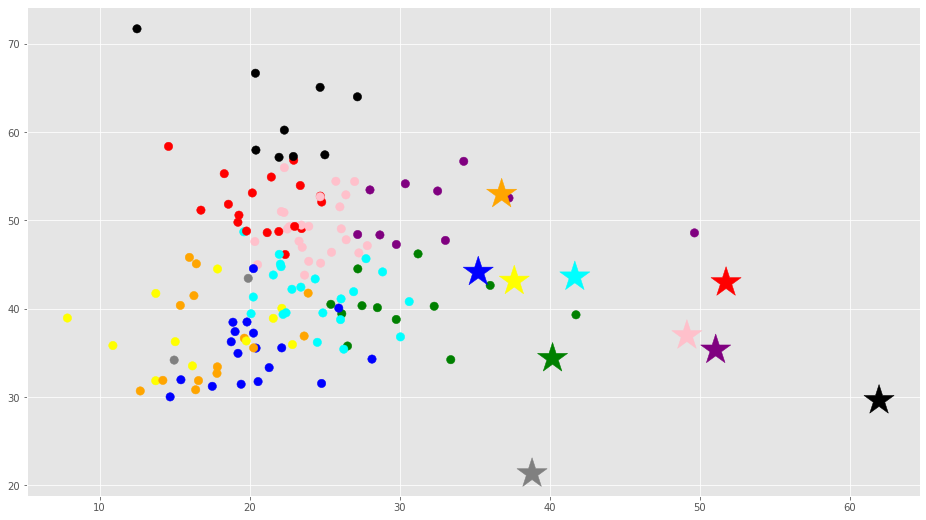

In [96]:
plt.scatter(f4, f1, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(EX)

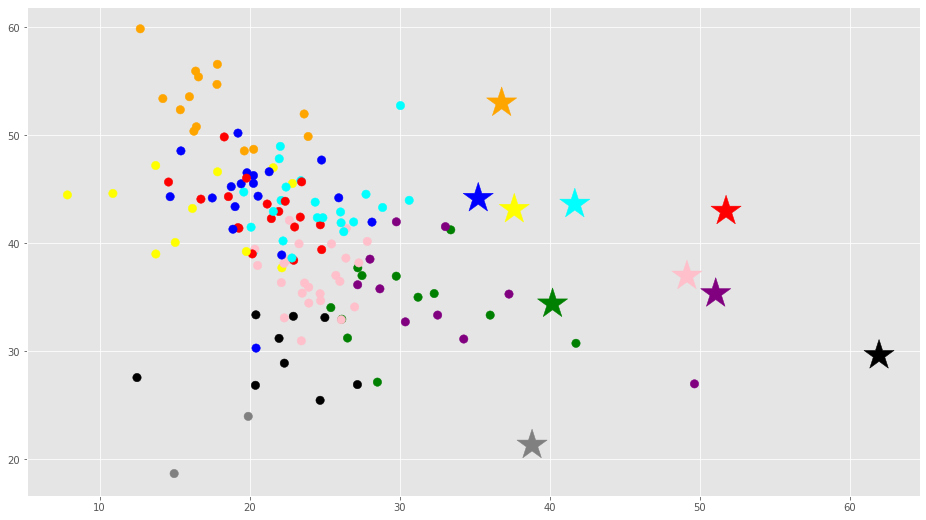

In [97]:
plt.scatter(f4, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(AG)

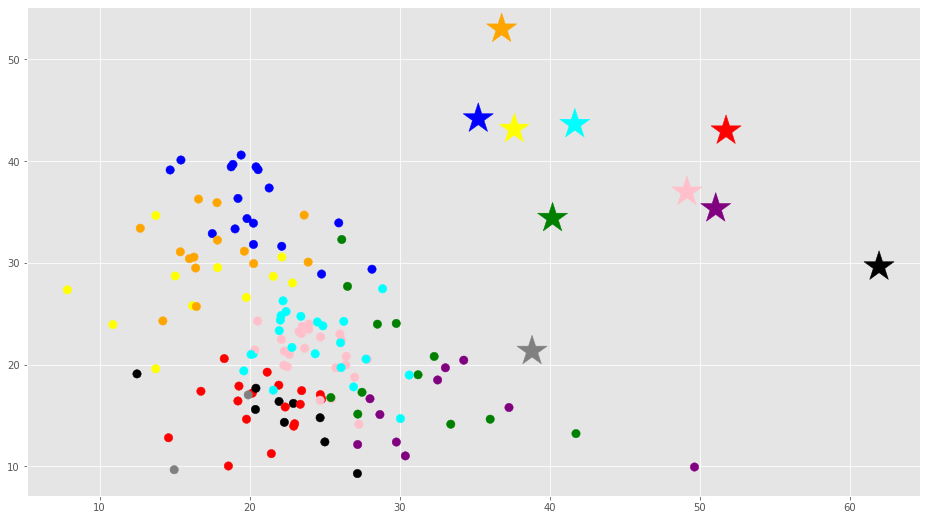

In [98]:
plt.scatter(f4, f3, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(NE)

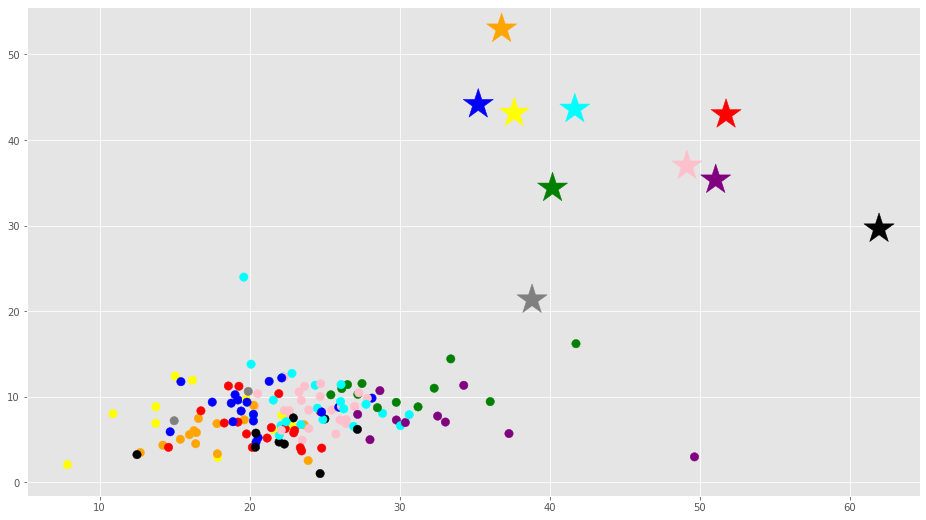

In [99]:
plt.scatter(f4, f5, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

##Graficas con x(NE)

y(OP)

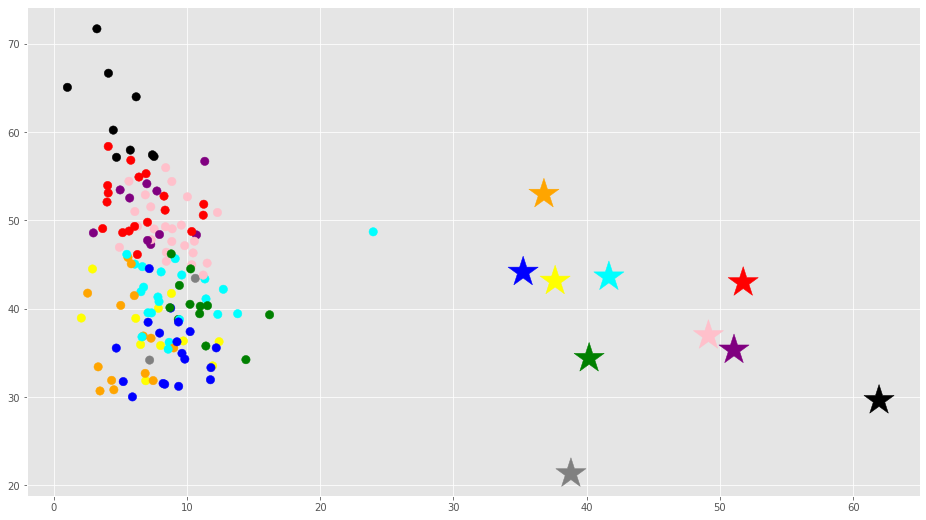

In [100]:
plt.scatter(f5, f1, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(EX)

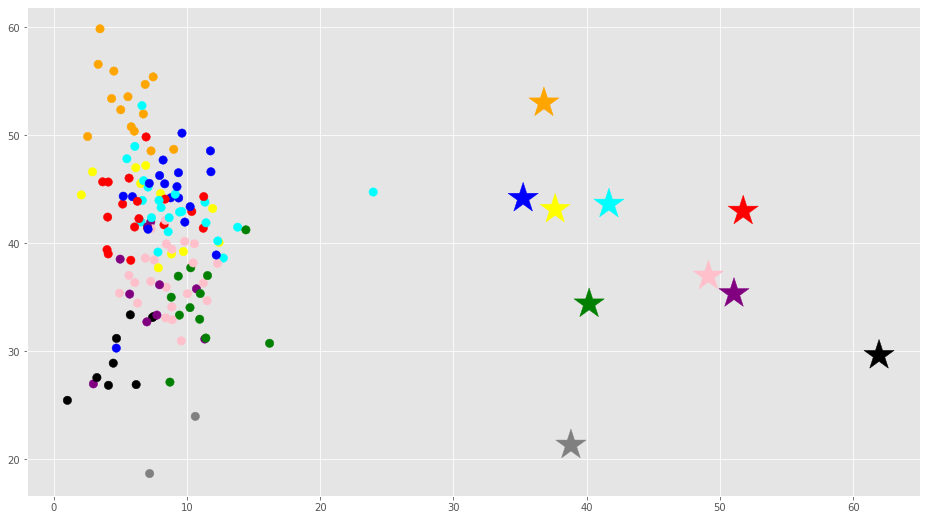

In [101]:
plt.scatter(f5, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(AG)

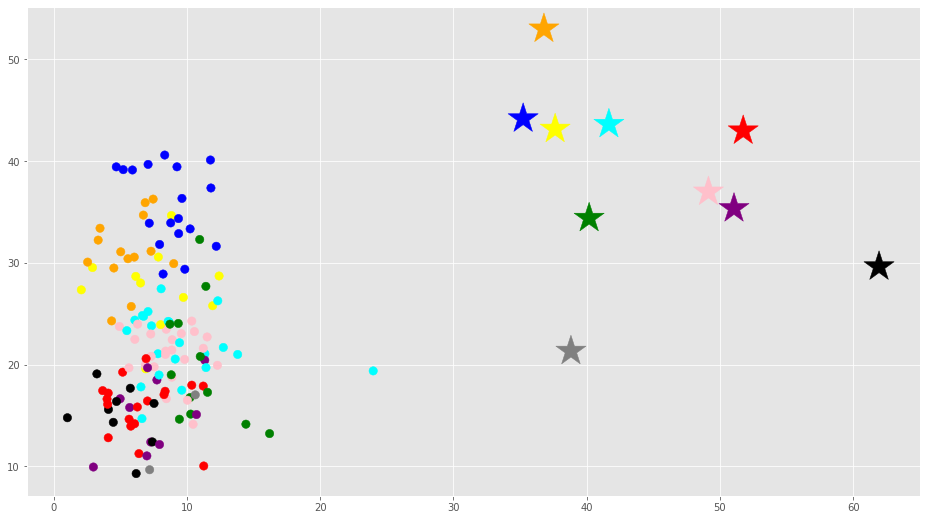

In [102]:
plt.scatter(f5, f3, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

y(CO)

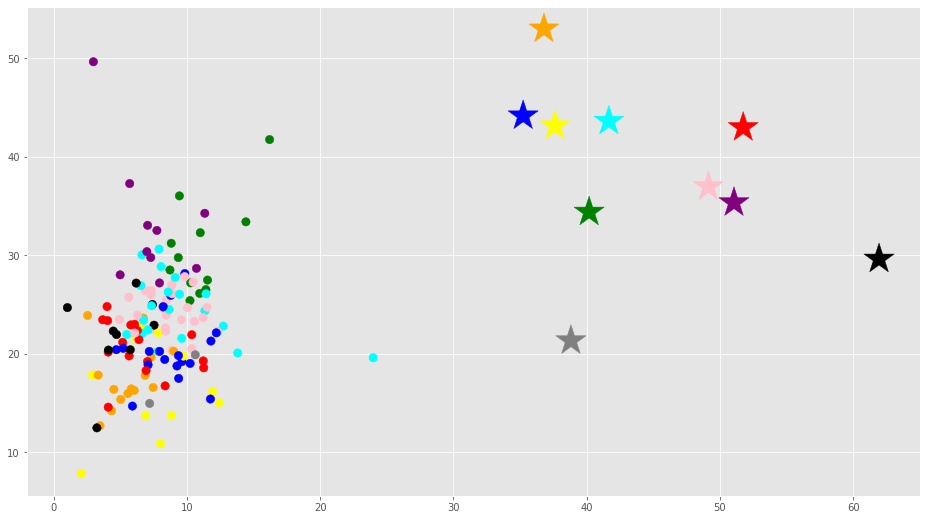

In [103]:
plt.scatter(f5, f4, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

##Mostramos los resultados en  tablas

In [104]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,18
1,red,18
2,green,12
3,yellow,11
4,cyan,22
5,orange,14
6,purple,10
7,pink,24
8,gray,2
9,black,9


In [105]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,2.0
2,2,1.0
3,3,NaN
4,4,5.0
5,5,2.0
6,6,NaN
7,7,4.0
8,8,2.0
9,9,2.0


In [106]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

perezreverte
britneyspears
kobebryant
JohnKerry
BillGates
AlejandroSanz
MeganFox516
CindyCrawford
Carrie_Br4dshaw
foofighters
